<a href="https://colab.research.google.com/gist/gevargas/7d649f530011e70557c92889b0ba1d27/exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/javieraespinosa/ense3.git

Cloning into 'ense3'...
remote: Enumerating objects: 41, done.
remote: Total 41 (delta 0), reused 0 (delta 0), pack-reused 41
Unpacking objects: 100% (41/41), done.


# ***Authors: Liselotte Swinkels & Youri van Veenendaal***

In [ ]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster

edu=pd.read_csv('/content/ense3/files/ch02/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


In [ ]:
import matplotlib.pylab as plt

In [ ]:
from sklearn import metrics
metrics.homogeneity_score([0,0,1,1],[1,1,0,0])

1.0

In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 1, 2]))

1.000


In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 2, 3]))

1.000


In [ ]:
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 1, 0, 1]))
print("%.3f" % metrics.homogeneity_score([0, 0, 1, 1], [0, 0, 0, 0]))
print(metrics.completeness_score([0, 0, 1, 1], [1, 1, 0, 0]))
print(metrics.completeness_score([0, 0, 1, 1], [0, 0, 0, 0]))
print(metrics.completeness_score([0, 1, 2, 3], [0, 0, 1, 1]))
print(metrics.completeness_score([0, 0, 1, 1], [0, 1, 0, 1]))
print(metrics.completeness_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000
0.000
1.0
1.0
0.9999999999999999
0.0
0.0


In [ ]:
print (metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 1]))
print (metrics.v_measure_score([0, 0, 1, 1], [1, 1, 0, 0]))

1.0
1.0


# **Question: Labelings that assign all classes members to the same clusters are: ___________, but not _____________:**

*Complete*, but not necessarily *homogeneous*. For example class 1 and 2 can both be fully in a cluster. This makes that for both classes all the classes members are in the same cluster, but the cluster itself does not consist of only one class!


In [ ]:
print("%.3f" % metrics.completeness_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.homogeneity_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 0, 0]))
print("%.3f" % metrics.v_measure_score([0, 0, 1, 2], [0, 0, 1, 1]))
print("%.3f" % metrics.v_measure_score([0, 1, 2, 3], [0, 0, 1, 1]))

1.000
0.000
0.000
0.800
0.667


# **Question: Labelings that have pure clusters with members coming from the same classes are ________________ but un-necessary splits harm ____________________ and thus penalise V-measure as well:**

*Homogene*, but un-necessary splits the classes harms *completeness* and thus penelaise V-measure as well. For example, cluster 1 can be totally consisting of class 1 and cluster 2 of class 2. But either class 1 or class 2 could also be present in a 3rd and 4rd cluster.

In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 1, 2]))
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 1, 2, 3]))

0.800
0.667


In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 0, 0], [0, 1, 2, 3]))

0.000


# **Question: Clusters that include samples from totally different classes totally destroy the _______________________  of the labelling, hence:**

*v_measure*, hence the v_measure will be close to 0


In [ ]:
print("%.3f" % metrics.v_measure_score([0, 0, 1, 1], [0, 0, 0, 0]))

0.000


# **K-means algorithm**

In [ ]:
import numpy as np

#Create some data
MAXN=40
X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)])
X = np.concatenate([X,[8,3]+1.2*np.random.randn(MAXN,2)])
X.shape

(120, 2)

KMeans(init='random', n_clusters=3)

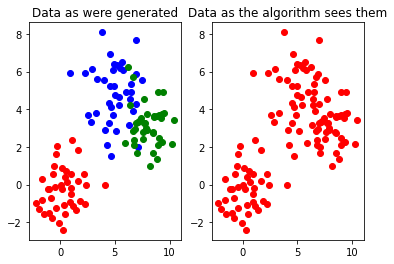

In [ ]:
#Just for visualization purposes, create the labels of the 3 distributions
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

plt.subplot(1,2,1)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.title('Data as were generated')

plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,1],color='r')
plt.title('Data as the algorithm sees them')

from sklearn import cluster

K=3 # Assuming to be 3 clusters!

clf = cluster.KMeans(init='random', n_clusters=K)
clf.fit(X)

In [ ]:
print (clf.labels_) # or
print (clf.predict(X)) # equivalent


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 0 2 0 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0
 0 0 0 0 0 2 0 0 0]


In [ ]:
print (X[(y==1).ravel(),0]) #numpy.ravel() returns a flattened array
print (X[(y==1).ravel(),1])

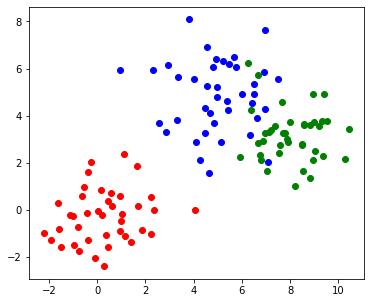

In [ ]:
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [ ]:
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
# c_ translates slice objects to concatenation along the second axis.

In [ ]:
Z=clf.predict(data) # returns the labels of the data
print(Z)

[1 1 1 ... 0 0 0]


# **Questions: How many “misclusterings” do we have?**

If we look closely and draw lines between the clusters. We can see that there are about 7 misclusters. Four blue ones and 3 green ones.

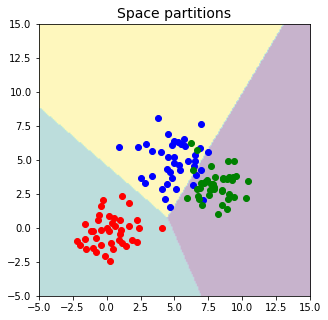

In [ ]:
# Visualize space partition
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower',
extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)
plt.title('Space partitions', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

fig = plt.gcf()
fig.set_size_inches((6,5))

In [ ]:
clf = cluster.KMeans(n_clusters=K, random_state=0)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering

data=np.c_[XX.ravel(),YY.ravel()]
Z=clf.predict(data) # returns the clustering labels of the data

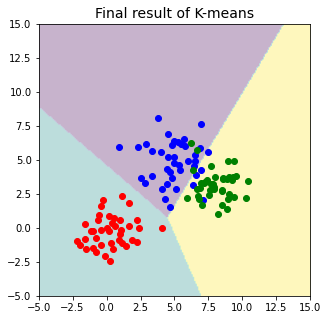

In [ ]:
plt.title('Final result of K-means', size=14)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')

plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower',
extent=(-5,15,-5,15),alpha=0.3, vmin=0, vmax=K-1)

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
fig = plt.gcf()
fig.set_size_inches((6,5))

So as we can see in the final result of the k-means, that there is one more miscluster which could not be seen by the blind eye. At the end we have 5 blue misclusterings and 3 green misclusterings.

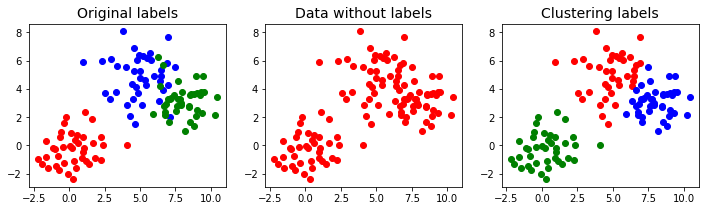

In [ ]:
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering
Zx=clf.predict(X)

plt.subplot(1,3,1)
plt.title('Original labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g') # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,2)
plt.title('Data without labels', size=14)
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='r') # b
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r') # g
fig = plt.gcf()
fig.set_size_inches((12,3))

plt.subplot(1,3,3)
plt.title('Clustering labels', size=14)
plt.scatter(X[(Zx==1).ravel(),0],X[(Zx==1).ravel(),1],color='r')
plt.scatter(X[(Zx==2).ravel(),0],X[(Zx==2).ravel(),1],color='b')
plt.scatter(X[(Zx==0).ravel(),0],X[(Zx==0).ravel(),1],color='g')
fig = plt.gcf()
fig.set_size_inches((12,3))

# **Question: Shall the centroids belong to the original set of points?**

Yes, the first centroid is chosen by assigning it to the location of a randomly chosen data point.

In [ ]:
from sklearn import metrics

clf = cluster.KMeans(n_clusters=K, init='k-means++', random_state=0,
max_iter=300, n_init=10)
#initialize the k-means clustering
clf.fit(X) #run the k-means clustering

print ('Final evaluation of the clustering:')

print('Inertia: %.2f' % clf.inertia_)

print('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(),
clf.labels_))

print('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(),
clf.labels_))

print('Completeness %.2f' % metrics.completeness_score(y.ravel(),
clf.labels_))

print('V_measure %.2f' % metrics.v_measure_score(y.ravel(), clf.labels_))

print('Silhouette %.2f' % metrics.silhouette_score(X, clf.labels_,
metric='euclidean'))

clf1 = cluster.KMeans(n_clusters=K, init='random', random_state=0,
max_iter=2, n_init=2)
#initialize the k-means clustering
clf1.fit(X) #run the k-means clustering

print ('Final evaluation of the clustering:')

print ('Inertia: %.2f' % clf1.inertia_)

print ('Adjusted_rand_score %.2f' % metrics.adjusted_rand_score(y.ravel(),
clf1.labels_))

print ('Homogeneity %.2f' % metrics.homogeneity_score(y.ravel(),
clf1.labels_))

print ('Completeness %.2f' % metrics.completeness_score(y.ravel(),
clf1.labels_))

print ('V_measure %.2f' % metrics.v_measure_score(y.ravel(),
clf1.labels_))

print ('Silhouette %.2f' % metrics.silhouette_score(X, clf1.labels_,
metric='euclidean'))

Final evaluation of the clustering:
Inertia: 374.03
Adjusted_rand_score 0.80
Homogeneity 0.79
Completeness 0.79
V_measure 0.79
Silhouette 0.52
Final evaluation of the clustering:
Inertia: 438.66
Adjusted_rand_score 0.68
Homogeneity 0.73
Completeness 0.75
V_measure 0.74
Silhouette 0.51


# **Case Study EUROSTAT**

# **Applying clustering to analyze countries according to their education resourses**



In [ ]:
#Read and check the dataset downloaded from the EuroStat

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import cluster


edu=pd.read_csv('/content/ense3/files/ch02/educ_figdp_1_Data.csv',na_values=':')
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


In [ ]:
#Pivot table in order to get a nice feature vector representation with dual indexing by TIME and GEO
pivedu=pd.pivot_table(edu, values='Value', index=['TIME', 'GEO'], columns=['INDIC_ED'])
pivedu.head()

INDIC_ED             Total public expenditure on education as % of GDP, for all levels of education combined
TIME GEO                                                                                                    
2000 Austria                                                      5.66                                      
     Bulgaria                                                     3.88                                      
     Cyprus                                                       5.42                                      
     Czech Republic                                               3.83                                      
     Denmark                                                      8.28

In [ ]:
print ('Let us check the two indices:\n')
print ('\nPrimary index (TIME): \n' + str(pivedu.index.levels[0].tolist()))
print ('\nSecondary index (GEO): \n' + str(pivedu.index.levels[1].tolist()))

Let us check the two indices:


Primary index (TIME): 
[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]

Secondary index (GEO): 
['Austria', 'Belgium', 'Bulgaria', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (13 countries)', 'Euro area (15 countries)', 'Euro area (17 countries)', 'Euro area (18 countries)', 'European Union (25 countries)', 'European Union (27 countries)', 'European Union (28 countries)', 'Finland', 'France', 'Germany (until 1990 former territory of the FRG)', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain']


In [ ]:
#Extract 2010 set of values
edu2010=pivedu.loc[2010]
edu2010.head()

INDIC_ED,"Total public expenditure on education as % of GDP, for all levels of education combined"
GEO,
Austria,5.91
Belgium,6.58
Bulgaria,4.10
Cyprus,7.92
Czech Republic,4.25


In [ ]:
#Store column names and clear them for better handling. Do the same with countries
edu2010 = edu2010.rename(index={'Euro area (13 countries)': 'EU13',
'Euro area (15 countries)': 'EU15',
'European Union (25 countries)': 'EU25',
'European Union (27 countries)': 'EU27',
'Former Yugoslav Republic of Macedonia, the': 'Macedonia',
'Germany (until 1990 former territory of the FRG)': 'Germany'
})

features = edu2010.columns.tolist()

countries = edu2010.index.tolist()

edu2010.columns=range(1)
edu2010.head()

,0
GEO,
Austria,5.91
Belgium,6.58
Bulgaria,4.10
Cyprus,7.92
Czech Republic,4.25


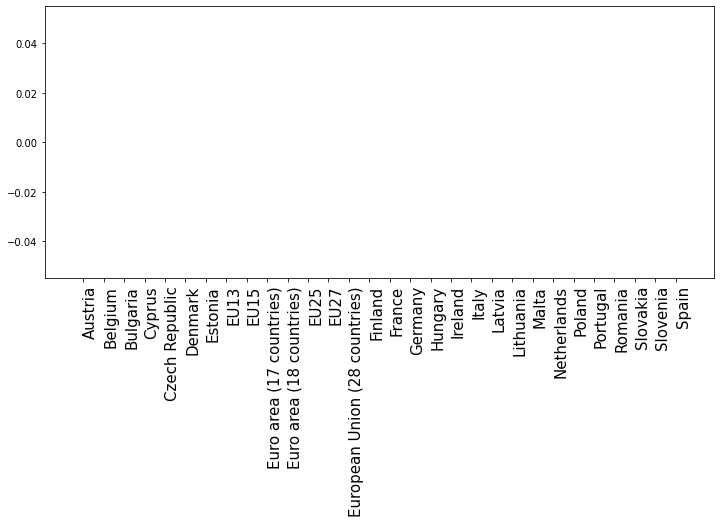

In [ ]:
#Check what is going on in the NaN data
nan_countries=np.sum(np.where(edu2010.isnull(),1,0),axis=1)
plt.bar(np.arange(nan_countries.shape[0]),nan_countries)
plt.xticks(np.arange(nan_countries.shape[0]),countries,rotation=90,horizontalalignment='left',
fontsize=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

[0]


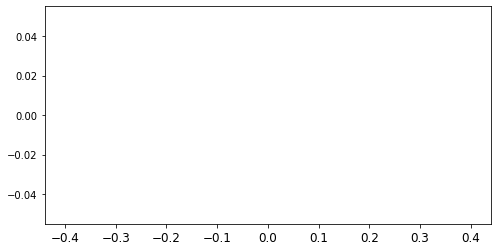

In [ ]:
#Remove non info countries
wrk_countries = nan_countries<4

educlean=edu2010.loc[wrk_countries] #.ix - Construct an open mesh from multiple sequences.

#Let us check the features we have
na_features = np.sum(np.where(educlean.isnull(),1,0),axis=0)
print (na_features)

plt.bar(np.arange(na_features.shape[0]),na_features)
plt.xticks(fontsize=12)
fig = plt.gcf()
fig.set_size_inches((8,4))

Now we have two options, either to fill the missing data or to drop the missing data.

In [ ]:
#Option A fills those features with some value, at risk of extracting wrong information
#Constant filling : edufill0=educlean.fillna(0)
edufill=educlean.fillna(educlean.mean())
print ('Filled in data shape: ' + str(edufill.shape))

#Option B drops those features
edudrop=educlean.dropna(axis=1)
#dropna: Return object with labels on given axis omitted where alternately any or
# all of the data are missing
print ('Drop data shape: ' + str(edudrop.shape))

Filled in data shape: (30, 1)
Drop data shape: (30, 1)


First we do the prediction with option A, filling the missing data.

In [ ]:
scaler = StandardScaler() #Standardize features by removing the mean and scaling to unit variance

X_train_fill = edufill.values
X_train_fill = scaler.fit_transform(X_train_fill)

clf = cluster.KMeans(init='k-means++', n_clusters=3, random_state=42)

clf.fit(X_train_fill) #Compute k-means clustering.

y_pred_fill = clf.predict(X_train_fill)
#Predict the closest cluster each sample in X belongs to.

idx=y_pred_fill.argsort()

Then we do the prediction with option B, drop the missing data.

In [ ]:
X_train_drop = edudrop.values
X_train_drop = StandardScaler().fit_transform(X_train_drop)

clf.fit(X_train_drop) #Compute k-means clustering.
y_pred_drop = clf.predict(X_train_drop) #Predict the closest cluster of each sample in X.

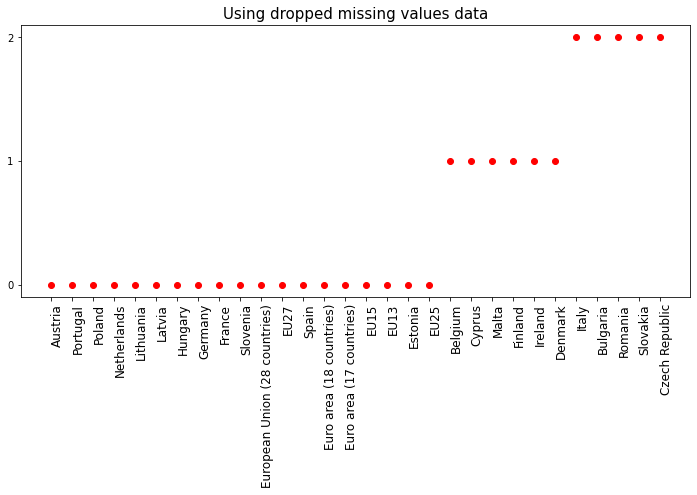

In [ ]:
idx=y_pred_drop.argsort()
plt.plot(np.arange(30),y_pred_drop[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],
rotation=90,horizontalalignment='left',fontsize=12)
plt.title('Using dropped missing values data',size=15)
fig = plt.gcf()
plt.yticks([0,1,2])
fig.set_size_inches((12,5))

([<matplotlib.axis.YTick at 0x7f3186bc3130>,
 <a list of 3 Text major ticklabel objects>)

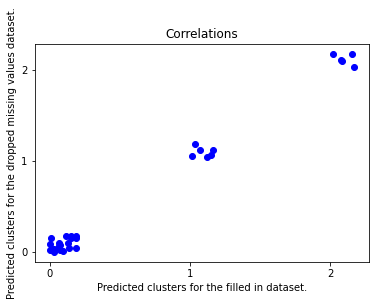

In [ ]:
plt.plot(y_pred_drop+0.2*np.random.rand(30),y_pred_fill+0.2*np.random.rand(30),'bo')
plt.xlabel('Predicted clusters for the filled in dataset.')
plt.ylabel('Predicted clusters for the dropped missing values dataset.')
plt.title('Correlations')
plt.xticks([0,1,2])
plt.yticks([0,1,2])

In [ ]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==0]))
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]))
print ('\n')
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==1]))
print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==1]))
print ('\n')
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_fill)
if item==2]))
print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==2]))
print ('\n')

Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'Euro area (17 countries)', 'Euro area (18 countries)', 'EU25', 'EU27', 'European Union (28 countries)', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain']
Cluster 0: 
['Austria', 'Estonia', 'EU13', 'EU15', 'Euro area (17 countries)', 'Euro area (18 countries)', 'EU25', 'EU27', 'European Union (28 countries)', 'France', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Netherlands', 'Poland', 'Portugal', 'Slovenia', 'Spain']


Cluster 1: 
['Belgium', 'Cyprus', 'Denmark', 'Finland', 'Ireland', 'Malta']
Cluster 1: 
['Belgium', 'Cyprus', 'Denmark', 'Finland', 'Ireland', 'Malta']


Cluster 2: 
['Bulgaria', 'Czech Republic', 'Italy', 'Romania', 'Slovakia']
Cluster 2: 
['Bulgaria', 'Czech Republic', 'Italy', 'Romania', 'Slovakia']




<ipython-input-38-920a7a4b1254>:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fx = np.vectorize(np.int)


([<matplotlib.axis.XTick at 0x7f3186b761f0>,
 [Text(0, 0, 'Austria'),
  Text(0, 0, 'Estonia'),
  Text(0, 0, 'EU13'),
  Text(0, 0, 'EU15'),
  Text(0, 0, 'Euro area (17 countries)'),
  Text(0, 0, 'Euro area (18 countries)'),
  Text(0, 0, 'EU25'),
  Text(0, 0, 'EU27'),
  Text(0, 0, 'European Union (28 countries)'),
  Text(0, 0, 'France'),
  Text(0, 0, 'Germany'),
  Text(0, 0, 'Hungary'),
  Text(0, 0, 'Latvia'),
  Text(0, 0, 'Lithuania'),
  Text(0, 0, 'Netherlands'),
  Text(0, 0, 'Poland'),
  Text(0, 0, 'Portugal'),
  Text(0, 0, 'Slovenia'),
  Text(0, 0, 'Spain')])

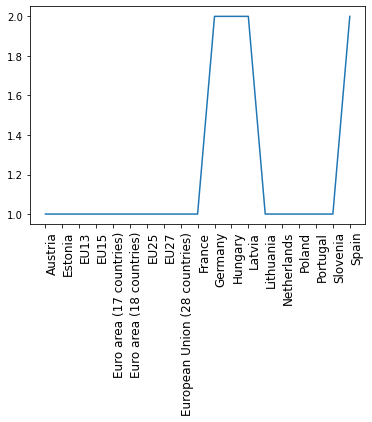

In [ ]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
#the distance of the elements of cluster 0 to the center of cluster 1

fx = np.vectorize(np.int)

plt.plot(np.arange(p.shape[0]),
fx(p)
)

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
horizontalalignment='left',fontsize=12)

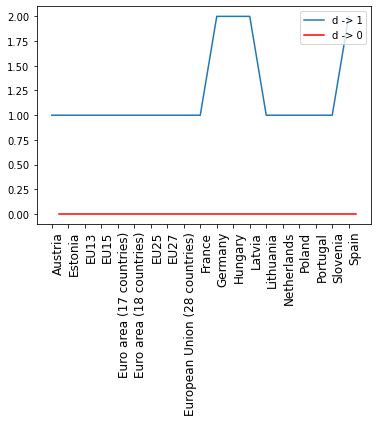

In [ ]:
from scipy.spatial import distance
p = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[1]],'euclidean')
pown = distance.cdist(X_train_drop[y_pred_drop==0,:],[clf.cluster_centers_[0]],'euclidean')

width=0.45
p0=plt.plot(np.arange(p.shape[0]),fx(p),width)
p1=plt.plot(np.arange(p.shape[0])+width,fx(pown),width,color = 'red')

wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]
zero_countries_names = [wrk_countries_names[i] for i,item in enumerate(y_pred_drop)
if item==0]
plt.xticks(np.arange(len(zero_countries_names)),zero_countries_names,rotation=90,
horizontalalignment='left',fontsize=12)
plt.legend( (p0[0], p1[0]), ('d -> 1', 'd -> 0') ,loc=1)

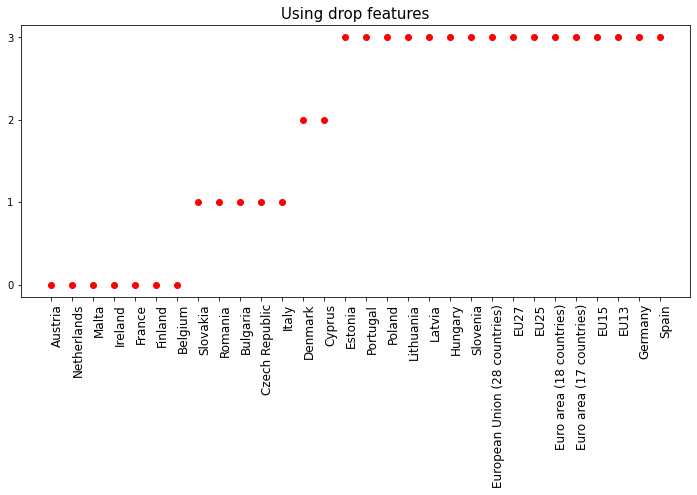

In [ ]:
X_train = edudrop.values
clf = cluster.KMeans(init='k-means++', n_clusters=4, random_state=0)
clf.fit(X_train)
y_pred = clf.predict(X_train)

idx=y_pred.argsort()
plt.plot(np.arange(30),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i] for i in idx],rotation=90,
horizontalalignment='left',fontsize=12)
plt.title('Using drop features',size=15)
plt.yticks([0,1,2,3])
fig = plt.gcf()
fig.set_size_inches((12,5))

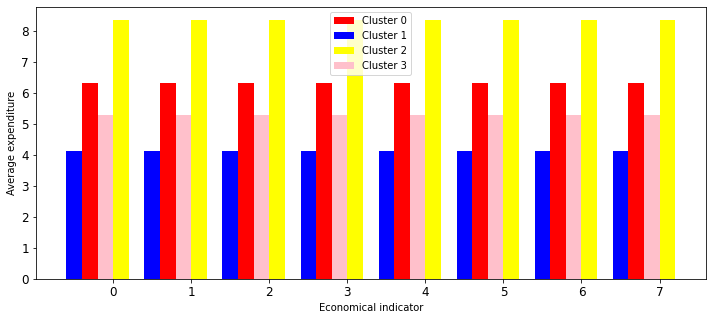

In [ ]:
width=0.2
p0 = plt.bar(np.arange(8)+1*width,clf.cluster_centers_[0],width,color='r')
p1 = plt.bar(np.arange(8),clf.cluster_centers_[1],width,color='b')
p2 = plt.bar(np.arange(8)+3*width,clf.cluster_centers_[2],width,color='yellow')
p3 = plt.bar(np.arange(8)+2*width,clf.cluster_centers_[3],width,color='pink')

plt.legend( (p0[0], p1[0], p2[0], p3[0]), ('Cluster 0', 'Cluster 1', 'Cluster 2',
'Cluster 3') ,loc=9)
plt.xticks(np.arange(8) + 0.5, np.arange(8),size=12)
plt.yticks(size=12)
plt.xlabel('Economical indicator')
plt.ylabel('Average expenditure')
fig = plt.gcf()
fig.set_size_inches((12,5))

In [ ]:
print ('Cluster 0: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==0]))

print ('Cluster 1: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==1]))

print ('Cluster 2: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==2]))

print ('Cluster 3: \n' + str([wrk_countries_names[i] for i,item in enumerate(y_pred) if item==3]))

#Save data for future use.
import pickle
ofname = open('edu2010.pkl', 'wb')
s = pickle.dump([edu2010, wrk_countries_names,y_pred ],ofname)
ofname.close()

Cluster 0: 
['Austria', 'Belgium', 'Finland', 'France', 'Ireland', 'Malta', 'Netherlands']
Cluster 1: 
['Bulgaria', 'Czech Republic', 'Italy', 'Romania', 'Slovakia']
Cluster 2: 
['Cyprus', 'Denmark']
Cluster 3: 
['Estonia', 'EU13', 'EU15', 'Euro area (17 countries)', 'Euro area (18 countries)', 'EU25', 'EU27', 'European Union (28 countries)', 'Germany', 'Hungary', 'Latvia', 'Lithuania', 'Poland', 'Portugal', 'Slovenia', 'Spain']


# **Spectral clustering**

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import euclidean_distances

X = StandardScaler().fit_transform(edudrop.values)

distances = euclidean_distances(edudrop.values)

spectral = cluster.SpectralClustering(n_clusters=4, affinity="nearest_neighbors")
spectral.fit(edudrop.values)

y_pred = spectral.labels_.astype(np.int)

<ipython-input-48-acc19d2cb325>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred = spectral.labels_.astype(np.int)


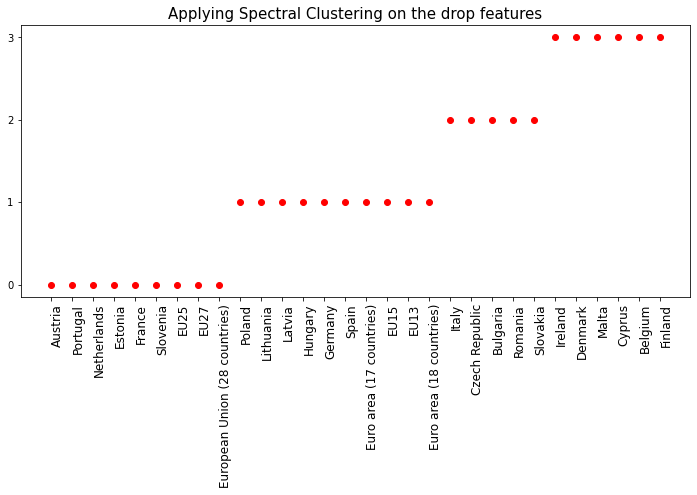

In [ ]:
idx=y_pred.argsort()

plt.plot(np.arange(30),y_pred[idx],'ro')
wrk_countries_names = [countries[i] for i,item in enumerate(wrk_countries) if item ]

plt.xticks(np.arange(len(wrk_countries_names)),[wrk_countries_names[i]
for i in idx],rotation=90,horizontalalignment='left',fontsize=12)

plt.yticks([0,1,2,3])

plt.title('Applying Spectral Clustering on the drop features',size=15)
fig = plt.gcf()
fig.set_size_inches((12,5))

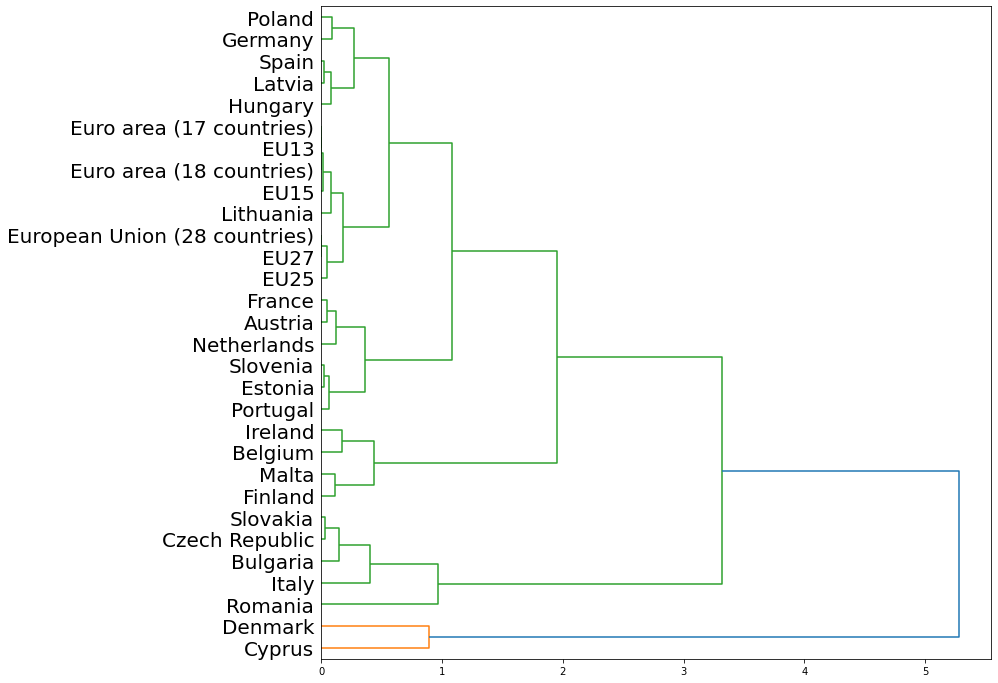

In [ ]:
X_train = edudrop.values
dist = pdist(X_train,'euclidean')
linkage_matrix = linkage(dist,method = 'complete');
plt.figure() # we need a tall figure
fig = plt.gcf()
fig.set_size_inches((12,12))
dendrogram(linkage_matrix, orientation="right", color_threshold = 4,labels = wrk_countries_names, leaf_font_size=20);

plt.show()

# **Pipeline of the Case study**



First we get the data from Eurostat, which is also used in the previous exercise in kaggle. Next in the casestudy, we apply the clustering to analyze the countries according to their education resources.
We try the code with 3 and with 4 clusters.
Next, we see that there is some missing data. We can use two different methods of dealing with this problem. Either to fill the missing data by for example an average value or drop the country that contains missing data.

Lastly, we can use spectral clustering which obtains more balanced clusters. The cluster names change a bit but the content remains almost the same!